In [1]:
"""
# overlay a smaller image on a larger image 
# python OpenCv - Stack Overflow = https://bit.ly/34rAk6N
"""
print(__doc__)


# overlay a smaller image on a larger image 
# python OpenCv - Stack Overflow = https://bit.ly/34rAk6N



In [2]:
import os
import sys
import cv2
import numpy
import matplotlib.pyplot as plt

from _path import DIR_SRC


# functions : for a few initial path setting



In [3]:
def getRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def detect(img, cascade):
    rects = cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=3, minSize=(10, 10), flags = cv.CV_HAAR_SCALE_IMAGE)
    if len(rects) == 0:
        return []
    rects[:,2:] += rects[:,:2]
    return rects

def draw_rects(img, rects, color):
    for x1, y1, x2, y2 in rects:
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

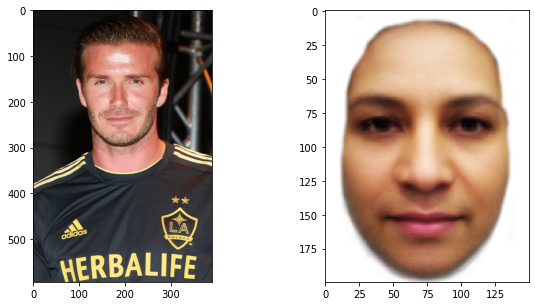

In [4]:
img_small = DIR_SRC + "float_face.png"
img_large = DIR_SRC + "david.jpg"

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(plt.imread(img_large))
axes[1].imshow(plt.imread(img_small))
plt.show()

# Transparent Image

In [5]:
l_img = cv2.imread(img_large)
s_img = cv2.imread(img_small, -1)
s_img = cv2.resize(
        s_img,
        dsize=(0, 0), 
        fx=1.25, 
        fy=1.25, 
        interpolation=cv2.INTER_LINEAR,
    )


print('l_img =', l_img.shape)
print('s_img =', s_img.shape, '     # Transparent')

l_img = (594, 390, 3)
s_img = (250, 188, 4)      # Transparent


In [6]:
x_offset, y_offset = (100, 40)
y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

print('x1,x2 =', x1,x2)
print('y1,y2 =', y1,y2)

x1,x2 = 100 288
y1,y2 = 40 290


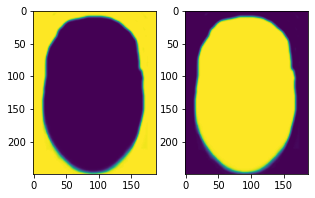

In [7]:
fig, axes = plt.subplots(1,2,figsize=(5,3))
axes[0].imshow(alpha_l)
axes[1].imshow(alpha_s)
plt.show()

In [8]:
for c in range(0, 3):
    l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                              alpha_l * l_img[y1:y2, x1:x2, c])

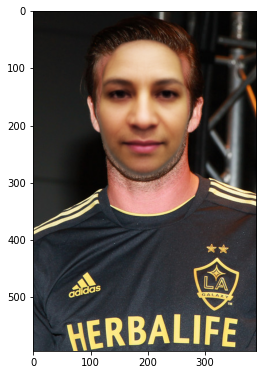

In [9]:
fig, ax = plt.subplots(1,1,figsize=(4,8))
plt.imshow(getRGB(l_img))
plt.show()

In [10]:
"""
# cv2 pop-up image window - If need
"""
# winName = 'overlayed image'
# cv2.imshow(winName, l_img)
# cv2.moveWindow(winName, 0,0)
# c = cv2.waitKey()
# print(f" press '{chr(c)}' = {c}")

# cv2.destroyAllWindows()

'\n# cv2 pop-up image window - If need\n'

In [11]:
"""
# face ROI Extract
"""
# cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
# gray = cv2.cvtColor(img, cv.CV_BGR2GRAY)
# gray = cv2.equalizeHist(gray)

# rects = detect(gray, cascade)

# ## Extract face coordinates         
# x1 = rects[0][3]
# y1 = rects[0][0]
# x2 = rects[0][4]
# y2 = rects[0][5]
# y=y2-y1
# x=x2-x1
# ## Extract face ROI
# faceROI = gray[x1:x2, y1:y2]

# ## Show face ROI
# cv2.imshow('Display face ROI', faceROI)
# small = cv2.imread("average_face.png",cv2.CV_LOAD_IMAGE_COLOR)  
# print "here"
# small=cv2.resize(small, (x, y))
# cv2.namedWindow('Display image')          ## create window for display
# cv2.imshow('Display image', small)          ## Show image in the window

# print "size of image: ", img.shape        ## print size of image
# cv2.waitKey(1000)

'\n# face ROI Extract\n'